In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Pasos:
- Cargar datos
- Normalizar los datos
- Agregar una columna de unos
- Calcular la predicción
- Calcular el costo
- Dos formas para calcular los parámetros (thetas)
  1. Ecuación Normal
  2. Gradiente Descendiente

<h1 style="font-size:10">1. Cargar los datos</h1>

In [2]:
X_train = pd.read_csv('train_ex1data1.csv')
y_train = pd.read_csv('y_train_ex1data1.csv')
X_test = pd.read_csv('test_ex1data1.csv')
y_test = pd.read_csv('y_test_ex1data1.csv')

In [3]:
print(X_train)

Num_Hab_Ciudad(Miles)
0                  6.1101
1                  5.5277
2                  8.5186
3                  7.0032
4                  5.8598
..                    ...
63                 5.0594
64                 5.7077
65                 7.6366
66                 5.3054
67                 8.2934

[68 rows x 1 columns]


In [4]:
print(y_train)

Rentabilidad_Ciudad(Miles)
0                     17.59200
1                      9.13020
2                     13.66200
3                     11.85400
4                      6.82330
..                         ...
63                     2.82140
64                     1.84510
65                     4.29590
66                     1.98690
67                     0.14454

[68 rows x 1 columns]


In [5]:
X_train = X_train.iloc[:,:] 
y_train = y_train.iloc[:, 0]
X_test = X_test.iloc[:,:] 
y_test = y_test.iloc[:, 0]

<h1 style="font-size:10">2. Normalización</h1>

Nos ayuda a extender o comprimir los valores de la variable para que estén en un rango definido.

 <span style='color:red'> - Feature Scaling, MinMax Scaler </span> 

  $X_{normalized} = \frac{X - X_{min}}{X_{max}- X_{min}}$

 <span style='color:red'> -Standard Scaler: </span> 

  $X_{normalized} = \frac{X - X_{mean}}{X_{stddev}}$

  también:

  $X_{i} = \frac{X_i - \mu_i}{S_i}$

  donde:

  - $\mu_i$ : media
  - $S_i$ : desviación estándar


In [6]:
X_media = np.concatenate((X_train, X_test), axis=0).mean(axis=0)
X_std = np.concatenate((X_train, X_test), axis=0).std(axis=0)
y_media = np.concatenate((y_train, y_test), axis=0).mean()
y_std = np.concatenate((y_train, y_test), axis=0).std()

In [7]:
X_train = (X_train - X_media)/X_std
y_train = (y_train - y_media)/y_std
X_test = (X_test - X_media)/X_std
y_test = (y_test - y_media)/y_std

print(X_train.shape)

(68, 1)


<h1 style="font-size:10">3. Agregar unos</h1>

In [8]:
n_exa_train = len(y_train)
n_exa_test = len(y_test)

X_train = np.concatenate((np.ones([n_exa_train, 1]), X_train), axis=1)
X_test = np.concatenate((np.ones([n_exa_test, 1]), X_test), axis=1)

print(X_train.shape)
print(X_train)

(68, 2)
[[ 1.         -0.53240565]
 [ 1.         -0.68368294]
 [ 1.          0.09319761]
 [ 1.         -0.30042464]
 [ 1.         -0.5974206 ]
 [ 1.          0.0579498 ]
 [ 1.         -0.63614904]
 [ 1.         -0.63009691]
 [ 1.          0.06457337]
 [ 1.         -0.6543314 ]
 [ 1.         -0.46609197]
 [ 1.         -0.78695878]
 [ 1.         -0.51188555]
 [ 1.         -0.47630007]
 [ 1.         -0.67402031]
 [ 1.          2.80143506]
 [ 1.          1.21255602]
 [ 1.          0.72656735]
 [ 1.          3.64769432]
 [ 1.         -0.75519159]
 [ 1.         -0.40790839]
 [ 1.         -0.58910866]
 [ 1.          0.01332508]
 [ 1.         -0.05880697]
 [ 1.         -0.0165979 ]
 [ 1.         -0.66326674]
 [ 1.          1.214634  ]
 [ 1.         -0.46920894]
 [ 1.         -0.71506051]
 [ 1.         -0.33177623]
 [ 1.         -0.61978491]
 [ 1.         -0.27707328]
 [ 1.         -0.61258989]
 [ 1.          0.91956017]
 [ 1.         -0.68007244]
 [ 1.         -0.74082752]
 [ 1.         -0.191

<h1 style="font-size:10">4. Calcular la predicción</h1>

In [9]:
def predict(theta, data):
    return np.dot(data, theta)
# print(predict(theta, X_train).shape)

<h1 style="font-size:10">5. Calcular costos</h1>

La función de costo nos ayuda a saber que tan incorrecto es el modelo en términos de su capacidad para estimar la relación entre X e y.

<span style='color:red'> - Función de costo </span> 

$J(\theta) = J(\theta_0, \theta_1, ..., \theta_n ) = \frac{1}{2m} \sum_{i=1}^m (h_{\theta}(x^{(i)})-y^{(i)})^2$

Donde:

- Parámetros : $\theta_0, \theta_1, ..., \theta_n$ 
- Predicción : $h_{\theta}(x^{(i)})$
- Respuesta correcta : $y^{(i)}$


In [10]:
# m = X.shape[0]

def cal_cost(theta, X, y):
    y_pred_test = predict(theta, X)
    to_sum = (y_pred_test - y) ** 2
    return np.sum(to_sum) / (X.shape[0]*2)

<h1 style="font-size:10">6. Calcular los parámetros</h1>

Una vez que definamos la función de costo para nuestro modelo, tendremos que averiguar cómo asignar valores de $\theta_0$ y $\theta_1$ (función lineal) de manera que el error para nuestro modelo sea mínimo.
Se comienza con algún valor de los parámetros y luego estos van a estar cambiando repetidamente los parámetros de modo que terminemos con un error mínimo para nuestro conjunto de datos de entrenamiento usando nuestra función de modelo.

<span style='color:red'> Gradiente descendiente </span> 

$\theta_j := \theta_j - \alpha \frac{\partial}{\partial\theta_j} J(\theta_0, \theta_1, ..., \theta_n )$

$\theta_j := \theta_j - \alpha \frac{1}{m} \sum_{i=1}^m (h_{\theta}(x^{(i)})-y^{(i)})x_j^{(i)}$


In [11]:
n_features = X_train.shape[1]
theta = np.zeros(n_features)
alpha = 0.01 # learning rate
iterations = 2000

def gradient_descent(X,y,theta):
    cost_history = np.zeros(iterations)
    for it in range(iterations):
        prediction = predict(theta, X)
        # m = prediction.shape[0]
        theta = theta - (1/prediction.shape[0])*alpha*( X.T.dot((prediction - y)))
        cost_history[it]  = cal_cost(theta,X,y)
    return theta, cost_history


In [12]:
theta_r, cost_history_r = gradient_descent(X_train, y_train, theta)
print(theta_r)
cost = cal_cost(theta,X_test, y_test)
print(cost)

[-0.03170536  0.83116436]
0.5362361804170243


In [13]:
print(cost_history_r)

[0.47834541 0.47226255 0.46629549 ... 0.15712061 0.15712061 0.15712061]


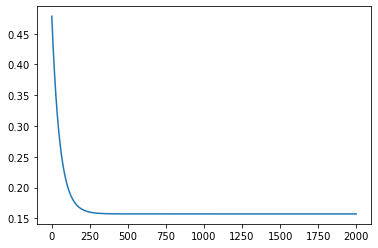

In [15]:
import matplotlib.pyplot as plt
plt.plot(cost_history_r)
plt.show()